In [119]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.pyplot as imread
import spacy 
import string
from wordcloud import WordCloud
%matplotlib inline

# import the data

In [120]:
data = pd.read_excel("hotel_reviews.xlsx")
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0
20487,great location price view hotel great quick pl...,4.0
20488,"ok just looks nice modern outside, desk staff ...",2.0
20489,hotel theft ruined vacation hotel opened sept ...,1.0


In [121]:
data = data.rename({'Review':'review','Rating':'rating'},axis=1)
data.head()

,review,rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0


# EXPLORATORY DATA ANALSYS

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   review  20491 non-null  object 
 1   rating  20491 non-null  float64
dtypes: float64(1), object(1)
memory usage: 320.3+ KB


In [123]:
data.describe()

,rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [124]:
data.isnull().sum()

review    0
rating    0
dtype: int64

In [125]:
data.shape

(20491, 2)

In [126]:
data.loc[data.duplicated()].shape

(0, 2)

#there are no duplicated rows in the data set

In [127]:
data.columns

Index(['review', 'rating'], dtype='object')

## there are no null values in the data
## there are no duplicated rows in the dataset


# missing values using the heatmap

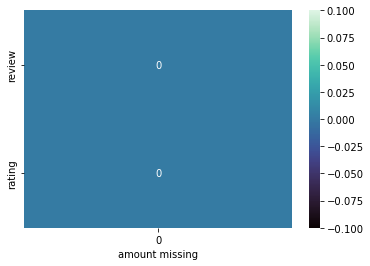

In [128]:
sns.heatmap(data.isnull().sum().to_frame(),annot=True,cmap='mako')
plt.xlabel('amount missing')
plt.show()

# outliers

In [129]:
data.rating.unique()

array([4., 2., 3., 5., 1.])

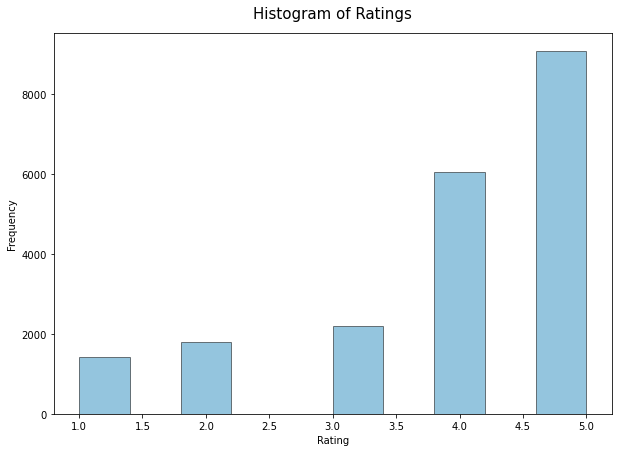

In [130]:
num_bins = 10

fig, ax = plt.subplots(figsize = (10,7))

n, bins, patches = ax.hist(data['rating'], num_bins, facecolor='#2b8cbe', alpha=0.5, edgecolor='#000000', linewidth=1)

ax.set_title('Histogram of Ratings', fontsize = 15, pad=15)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')

plt.show()

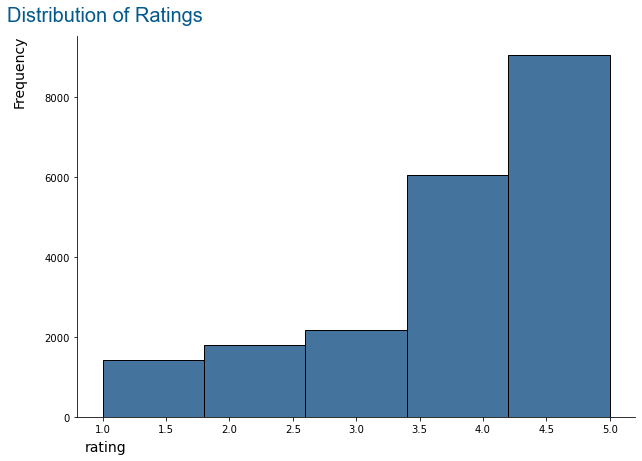

In [131]:
num_bins = 5

font = {'family': 'Arial',
       'color': '#045a8d',
       'size': 20}

fig, ax = plt.subplots(figsize = (10,7))

n, bins, patches = ax.hist(data['rating'], num_bins, facecolor='#44749D', edgecolor='#000000', linewidth=1)

ax.set_title('Distribution of Ratings', fontdict = font, pad=15)
ax.set_xlabel('rating', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)

ax.title.set_position([.05, 0])
ax.yaxis.set_label_coords(-.09,.91)
ax.xaxis.set_label_coords(.05, -.06)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)


In [132]:
# filter reviews that are only in the english language
data = data[data['review'].str.contains('en')]
data.head(3)

,review,rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0


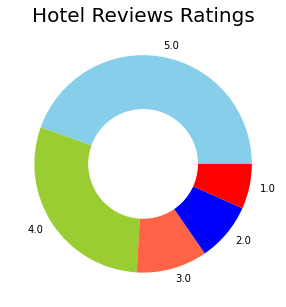

In [133]:
ratings = data["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Hotel Reviews Ratings", fontsize=20)
plt.show()

# Creating possitive/negative/neutral column using pie chart

In [134]:
# bin the data into negative, neutral, and positive values
bins = [0, 2, 4, 6]

bin_names = ['negative', 'neutral', 'positive']

score_bin = pd.Series(data.rating, name = 'score')

score = pd.cut(score_bin, bins, labels=bin_names, right=False)

In [135]:
pd.value_counts(score)

positive    14553
neutral      3782
negative     1315
Name: score, dtype: int64

In [136]:
# add the bins into the dataframe

data = pd.concat([data, score], axis=1)

data.head(2)

,review,rating,score
0,nice hotel expensive parking got good deal sta...,4.0,positive
1,ok nothing special charge diamond member hilto...,2.0,neutral


In [137]:
counts_df = data[['score', 'review']]

In [138]:
counts_df.loc[:,'word_count'] = counts_df.loc[:,'review'].apply(lambda x: len(str(x).split(" ")))

In [139]:
counts_df.head()

,score,review,word_count
0,positive,nice hotel expensive parking got good deal sta...,89
1,neutral,ok nothing special charge diamond member hilto...,252
2,neutral,nice rooms not 4* experience hotel monaco seat...,219
3,positive,"unique, great stay, wonderful time hotel monac...",91
4,positive,"great stay great stay, went seahawk game aweso...",193


In [140]:
# number of characters in the review
counts_df.loc[:,'char_count'] = counts_df.loc[:,'review'].str.len()

In [141]:
counts_df.head()

,score,review,word_count,char_count
0,positive,nice hotel expensive parking got good deal sta...,89,593
1,neutral,ok nothing special charge diamond member hilto...,252,1689
2,neutral,nice rooms not 4* experience hotel monaco seat...,219,1427
3,positive,"unique, great stay, wonderful time hotel monac...",91,600
4,positive,"great stay great stay, went seahawk game aweso...",193,1281


In [142]:
counts_df.describe()

,word_count,char_count
count,19650.000000,19650.000000
mean,109.311094,745.867888
std,101.685233,696.662663
min,11.000000,55.000000
25%,53.000000,357.000000
50%,81.000000,555.000000
75%,129.000000,882.000000
max,1933.000000,13501.000000


In [143]:
# separate by positive and negative reviews
counts_pos = counts_df.loc[(counts_df['score']=='positive')]

counts_neg = counts_df.loc[(counts_df['score']=='negative')]

In [144]:
counts_pos.describe()

,word_count,char_count
count,14553.000000,14553.000000
mean,103.922009,712.603587
std,98.894405,677.761970
min,11.000000,61.000000
25%,50.000000,341.000000
50%,77.000000,527.000000
75%,122.000000,841.000000
max,1757.000000,12762.000000


In [145]:
counts_neg.describe()

,word_count,char_count
count,1315.000000,1315.000000
mean,120.438783,812.168061
std,101.263148,697.149444
min,14.000000,89.000000
25%,60.000000,392.000000
50%,90.000000,605.000000
75%,148.000000,1001.000000
max,956.000000,6511.000000


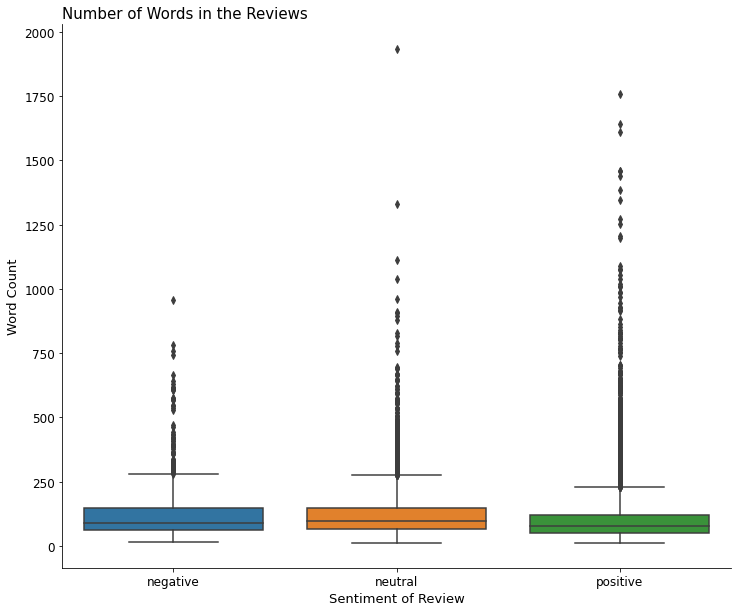

In [146]:
# create figure
fig, ax = plt.subplots(figsize = (12,10))

sns.boxplot(x=counts_df['score'], y=counts_df['word_count'])

# title
ax.set_title('Number of Words in the Reviews', fontsize = 15, loc = 'left')

# set x axis label
ax.set_xlabel('Sentiment of Review', fontsize = 13)

# set y axis label
ax.set_ylabel('Word Count', fontsize = 13)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()

In [147]:
print('There are {} total number of reviews to find insights from.'.format(data.shape[0]))

There are 19650 total number of reviews to find insights from.


In [148]:
# export cleaned data
data.to_csv('E:\Hotel_reviews.csv', index=False)

In [149]:
import re

In [150]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [151]:
pip install pyspellchecker

In [152]:
pip install emot

Note: you may need to restart the kernel to use updated packages.


In [153]:
from textblob import TextBlob
from spellchecker import SpellChecker
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS

In [154]:
from collections import Counter

In [155]:
hotel_df = pd.read_csv('E:\Hotel_reviews.csv')
hotel_df.head(2)

,review,rating,score
0,nice hotel expensive parking got good deal sta...,4.0,positive
1,ok nothing special charge diamond member hilto...,2.0,neutral


In [156]:
hotel_df.shape

(19650, 3)

In [157]:
df = hotel_df[['score', 'review']]
df.head(2)

,score,review
0,positive,nice hotel expensive parking got good deal sta...
1,neutral,ok nothing special charge diamond member hilto...


In [158]:
df.loc[:,'review_cln'] = df['review']

In [159]:
df

,score,review,review_cln
0,positive,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,neutral,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,neutral,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...
3,positive,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac..."
4,positive,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso..."
...,...,...,...
19645,positive,"best kept secret 3rd time staying charm, not 5...","best kept secret 3rd time staying charm, not 5..."
19646,positive,great location price view hotel great quick pl...,great location price view hotel great quick pl...
19647,neutral,"ok just looks nice modern outside, desk staff ...","ok just looks nice modern outside, desk staff ..."
19648,negative,hotel theft ruined vacation hotel opened sept ...,hotel theft ruined vacation hotel opened sept ...


In [160]:
df.shape

(19650, 3)

# Text Pre-Processing

In [161]:
df.loc[:,'review_cln'] = df.loc[:,'review_cln'].str.lower()

In [162]:
df['review_cln'].head(20)

0     nice hotel expensive parking got good deal sta...
1     ok nothing special charge diamond member hilto...
2     nice rooms not 4* experience hotel monaco seat...
3     unique, great stay, wonderful time hotel monac...
4     great stay great stay, went seahawk game aweso...
5     love monaco staff husband stayed hotel crazy w...
6     cozy stay rainy city, husband spent 7 nights m...
7     excellent staff, housekeeping quality hotel ch...
8     hotel stayed hotel monaco cruise, rooms genero...
9     excellent stayed hotel monaco past w/e delight...
10    poor value stayed monaco seattle july, nice ho...
11    nice hotel good location hotel kimpton design ...
12    nice hotel not nice staff hotel lovely staff q...
13    great hotel night quick business trip, loved l...
14    horrible customer service hotel stay february ...
15    disappointed say anticipating stay hotel monac...
16    fantastic stay monaco seattle hotel monaco hol...
17    good choice hotel recommended sister, grea

In [163]:
#Remove punctuation marks

In [164]:
df.loc[:,'review_cln'] = df.loc[:,'review_cln'].str.replace('[^\w\s]',' ')

C:\Users\DELL\AppData\Local\Temp\ipykernel_12196\112891400.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[:,'review_cln'] = df.loc[:,'review_cln'].str.replace('[^\w\s]',' ')


In [165]:
df['review_cln'].head(20)

0     nice hotel expensive parking got good deal sta...
1     ok nothing special charge diamond member hilto...
2     nice rooms not 4  experience hotel monaco seat...
3     unique  great stay  wonderful time hotel monac...
4     great stay great stay  went seahawk game aweso...
5     love monaco staff husband stayed hotel crazy w...
6     cozy stay rainy city  husband spent 7 nights m...
7     excellent staff  housekeeping quality hotel ch...
8     hotel stayed hotel monaco cruise  rooms genero...
9     excellent stayed hotel monaco past w e delight...
10    poor value stayed monaco seattle july  nice ho...
11    nice hotel good location hotel kimpton design ...
12    nice hotel not nice staff hotel lovely staff q...
13    great hotel night quick business trip  loved l...
14    horrible customer service hotel stay february ...
15    disappointed say anticipating stay hotel monac...
16    fantastic stay monaco seattle hotel monaco hol...
17    good choice hotel recommended sister  grea

# remove numbers and white spaces

In [166]:
def remove_numbers(review):
    """Function to remove numbers and whitespace."""
    
    # remove numbers
    pattern = r'[^a-zA-z\s*|\s\\s]' 
    review2 = re.sub(pattern, '', review)
    
    # remove white space where number was at
    pattern2 = r'^\s*|\s\s*'
    return re.sub(pattern2, ' ', review2).strip()

In [167]:
df.loc[:,'review_cln'] = df.loc[:,'review_cln'].apply(lambda x: str(remove_numbers(x)))
df['review_cln'].head(20)

0     nice hotel expensive parking got good deal sta...
1     ok nothing special charge diamond member hilto...
2     nice rooms not experience hotel monaco seattle...
3     unique great stay wonderful time hotel monaco ...
4     great stay great stay went seahawk game awesom...
5     love monaco staff husband stayed hotel crazy w...
6     cozy stay rainy city husband spent nights mona...
7     excellent staff housekeeping quality hotel cho...
8     hotel stayed hotel monaco cruise rooms generou...
9     excellent stayed hotel monaco past w e delight...
10    poor value stayed monaco seattle july nice hot...
11    nice hotel good location hotel kimpton design ...
12    nice hotel not nice staff hotel lovely staff q...
13    great hotel night quick business trip loved li...
14    horrible customer service hotel stay february ...
15    disappointed say anticipating stay hotel monac...
16    fantastic stay monaco seattle hotel monaco hol...
17    good choice hotel recommended sister great

# spell check words

In [168]:
spell = SpellChecker()

In [169]:
df.loc[:,'review_cln'] = df.loc[:,'review_cln'].apply(lambda x: str(spell.correction(x)))

In [170]:
df

,score,review,review_cln
0,positive,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,neutral,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,neutral,nice rooms not 4* experience hotel monaco seat...,nice rooms not experience hotel monaco seattle...
3,positive,"unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...
4,positive,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...
...,...,...,...
19645,positive,"best kept secret 3rd time staying charm, not 5...",best kept secret rd time staying charm not sta...
19646,positive,great location price view hotel great quick pl...,great location price view hotel great quick pl...
19647,neutral,"ok just looks nice modern outside, desk staff ...",ok just looks nice modern outside desk staff n...
19648,negative,hotel theft ruined vacation hotel opened sept ...,hotel theft ruined vacation hotel opened sept ...


# Normalisation - Lematisation

In [171]:
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
# part of speach tag
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV} 

def lemmatize_words(review):
    """Function for lemmatization using part of speach tag"""
    pos_tagged_review = nltk.pos_tag(review.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) 
                     for word, pos in pos_tagged_review])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [172]:
df.loc[:,'review_cln'] = df.loc[:,'review_cln'].apply(lambda x: str(lemmatize_words(x)))

In [173]:
df['review_cln'].head(20)

0     nice hotel expensive parking get good deal sta...
1     ok nothing special charge diamond member hilto...
2     nice room not experience hotel monaco seattle ...
3     unique great stay wonderful time hotel monaco ...
4     great stay great stay go seahawk game awesome ...
5     love monaco staff husband stay hotel crazy wee...
6     cozy stay rainy city husband spend night monac...
7     excellent staff housekeep quality hotel chock ...
8     hotel stay hotel monaco cruise room generous d...
9     excellent stay hotel monaco past w e delight r...
10    poor value stay monaco seattle july nice hotel...
11    nice hotel good location hotel kimpton design ...
12    nice hotel not nice staff hotel lovely staff q...
13    great hotel night quick business trip love lit...
14    horrible customer service hotel stay february ...
15    disappointed say anticipate stay hotel monaco ...
16    fantastic stay monaco seattle hotel monaco hol...
17    good choice hotel recommend sister great l

In [174]:
cln_full_sentence = pd.Series(df['review_cln'], name='cln_full_sentence')

# Remove stopwords


In [175]:
nltk.download('stopwords')
STOPWORDS = set('english')

def stopwords(Review):
    """Function to remove stopwords"""
    return " ".join([word for word in str(Review).split() if word not in STOPWORDS])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [176]:
df.loc[:,'review_cln'] = df.loc[:,'review_cln'].apply(lambda x: str(stopwords(x)))

In [177]:
df['review_cln'].head(10)

0    nice hotel expensive parking get good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice room not experience hotel monaco seattle ...
3    unique great stay wonderful time hotel monaco ...
4    great stay great stay go seahawk game awesome ...
5    love monaco staff husband stay hotel crazy wee...
6    cozy stay rainy city husband spend night monac...
7    excellent staff housekeep quality hotel chock ...
8    hotel stay hotel monaco cruise room generous d...
9    excellent stay hotel monaco past w delight rec...
Name: review_cln, dtype: object

In [178]:
freq = pd.Series(' '.join(df['review_cln']).split()).value_counts()[-100:] # 100 rare words
freq = list(freq.index)

In [179]:
freq

['bedpillows',
 'qld',
 'donette',
 'citylife',
 'imp',
 'unfort',
 'morrisey',
 'cultery',
 'piper',
 'deisel',
 'overfull',
 'bedspead',
 'yukky',
 'roundtree',
 'possibiltity',
 'lumberyard',
 'confronted',
 'roundhouse',
 'tv___x_s',
 'tha_kfully',
 'getfresh',
 'reconditionning',
 'nicepart',
 'impersonnal',
 'undertand',
 'mng',
 'batt',
 'pastrami',
 'bateaux',
 'mingles',
 'kamlyn',
 'unclogging',
 'decree',
 'governance',
 'developmentally',
 'manhattn',
 'negatie',
 'libery',
 'littled',
 'greenich',
 'stunned',
 'bellservice',
 'blubber',
 'ditsy',
 'bedsthe',
 'gigino',
 'stautue',
 'cathartic',
 'journeyed',
 'replenishes',
 'maree',
 'refridgerater',
 'bernadins',
 'mastering',
 'stade',
 'sirius',
 'etienne',
 'eglise',
 'hunderd',
 'returrned',
 'orly',
 'direclty',
 'grandes',
 'conveince',
 'sailboarding',
 'mcgillycuddy',
 'stovetops',
 'freezie',
 'napping',
 'fishies',
 'couter',
 'grenade',
 'seaviews',
 'wylands',
 'bellclerk',
 'snags',
 'hoteld',
 'pedigree',
 

In [180]:
# if the word is not in the freq list, then keep it in the text_cln.

df.loc[:,'review_cln'] = df.loc[:,'review_cln'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['review_cln'].head()

0    nice hotel expensive parking get good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice room not experience hotel monaco seattle ...
3    unique great stay wonderful time hotel monaco ...
4    great stay great stay go seahawk game awesome ...
Name: review_cln, dtype: object

In [181]:
review_clean = df[['review_cln']]

hotel_review_cln = pd.concat([hotel_df, cln_full_sentence, review_clean], axis=1)

In [182]:
hotel_review_cln.head(3)

,review,rating,score,cln_full_sentence,review_cln
0,nice hotel expensive parking got good deal sta...,4.0,positive,nice hotel expensive parking get good deal sta...,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...,2.0,neutral,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3.0,neutral,nice room not experience hotel monaco seattle ...,nice room not experience hotel monaco seattle ...


In [183]:
hotel_review_cln.to_csv('E:\Hotel_reviews.csv', index=False)

# text insights and analsys

In [184]:
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk import FreqDist, bigrams
import nltk.collocations as collocations
import nltk

In [185]:
reviews_df = pd.read_csv('E:\Hotel_reviews.csv')
reviews_df.head(2)

,review,rating,score,cln_full_sentence,review_cln
0,nice hotel expensive parking got good deal sta...,4.0,positive,nice hotel expensive parking get good deal sta...,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...,2.0,neutral,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...


In [186]:
reviews_df.dropna(subset=['review_cln'], inplace=True)

In [187]:

pos = reviews_df.loc[(reviews_df['score']=='positive')]
neg = reviews_df.loc[(reviews_df['score']=='negative')]

# Wordclouds

In [188]:
stopwords = set(STOPWORDS)
stopwords.update(['hotel', 'room', 'stay'])

In [189]:
pos_review = " ".join(review for review in pos.review_cln)

In [190]:
pos_review[:2000]

'nice hotel expensive parking get good deal stay hotel anniversary arrive late evening take advice previous review do valet park check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillow not soundproof like heard music room night morning loud bang door open closing hear people talk hallway maybe just noisy neighbor aveda bath product nice do not goldfish stay nice touch take advantage stay long location great walk distance shop overall nice experience have pay park night unique great stay wonderful time hotel monaco location excellent short stroll main downtown shop area pet friendly room show no sign animal hair smell monaco suite sleep area big strip curtain pull closed nice touch felt cosy goldfish name brandi enjoy do t partake free wine coffee tea service lobby think great feature great staff friendly free wireless internet hotel work suite laptop decor lovely eclectic mix patten color palatte animal print bathrobe

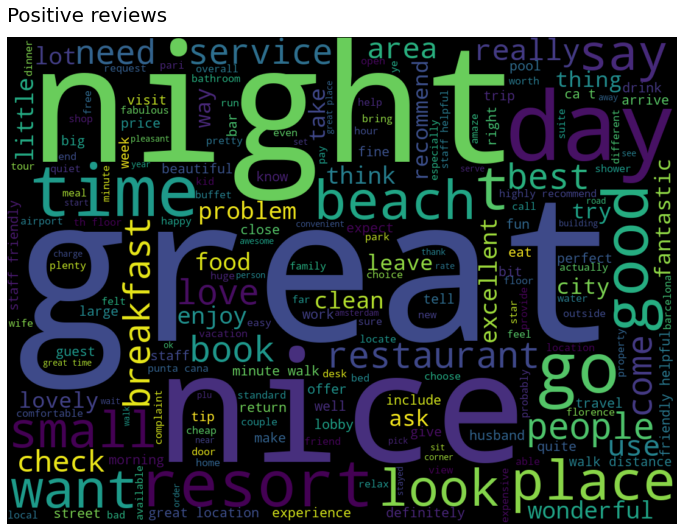

In [191]:
fig, ax = plt.subplots(figsize = (12,10))

wordcloud = WordCloud(width=1100, height=800, stopwords=stopwords).generate(pos_review)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

ax.set_title('Positive reviews', pad=15, fontsize = 20)
ax.title.set_position([.12, 0])

plt.show()

In [192]:
neg_review = " ".join(review for review in neg.review_cln)

In [193]:
neg_review[:2000]

'horrible customer service hotel stay february rd th my friend pick hotel monaco appeal website online package include champagne late checkout free valet gift spa weekend friend check room hour earlier come later pull valet young man just stand asked valet open say pull bag didn____ offer help get garment bag suitcase come car key room number say not valet car park car street pull leave key work ask valet park car get go room fine bottle champagne oil lotion gift spa dress go come get bed notice blood drop pillow sheet pillow disgust just unbelievable call desk sent somebody minute later swap sheet leave apologize sunday morning call desk speak management sheet aggravate rude apparently no manager kind supervisor weekend wait monday morning young man speak say cover food add person change sheet say fresh blood rude tone checkout pm package book staff maid try walk room open door apologize closing people call say check remind package finally pack thing go downstairs check quickly sign p

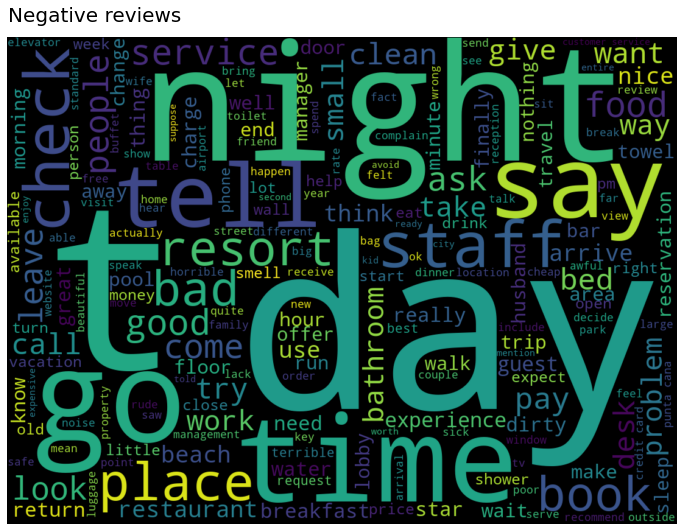

In [194]:
# create figure
fig, ax = plt.subplots(figsize = (12,10))

wordcloud = WordCloud(width=1100, height=800, stopwords=stopwords).generate(neg_review)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

ax.set_title('Negative reviews', pad=15, fontsize = 20)
ax.title.set_position([.13, 0])

plt.show()

# Term Frequency & Inverse Document Frequency (TF-IDF)
#Positive Reviews TF-IDF

In [195]:
pos_corpus = pos.review_cln.tolist()

In [196]:
pos_corpus[:10]

['nice hotel expensive parking get good deal stay hotel anniversary arrive late evening take advice previous review do valet park check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillow not soundproof like heard music room night morning loud bang door open closing hear people talk hallway maybe just noisy neighbor aveda bath product nice do not goldfish stay nice touch take advantage stay long location great walk distance shop overall nice experience have pay park night',
 'unique great stay wonderful time hotel monaco location excellent short stroll main downtown shop area pet friendly room show no sign animal hair smell monaco suite sleep area big strip curtain pull closed nice touch felt cosy goldfish name brandi enjoy do t partake free wine coffee tea service lobby think great feature great staff friendly free wireless internet hotel work suite laptop decor lovely eclectic mix patten color palatte animal print bat

In [197]:
# initiate TfidVectorizer
tfIdfVectorizer=TfidfVectorizer(use_idf=True)

# fit the positive documents
tfIdf = tfIdfVectorizer.fit_transform(pos_corpus)

# create dataframe of positive tfidf's
pos_tfidf = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), 
                         columns=["TF-IDF"])

# sort in descending order
pos_tfidf = pos_tfidf.sort_values('TF-IDF', ascending=False)

In [198]:
pos_tfidf.head(25)

,TF-IDF
nice,0.255930
goldfish,0.208242
stiff,0.198390
woke,0.197058
neck,0.192324
closing,0.191264
existent,0.190246
park,0.176838
soundproof,0.172754
aveda,0.168105


In [199]:
neg_corpus = neg.review_cln.tolist()

In [200]:
neg_corpus[:10]

['horrible customer service hotel stay february rd th my friend pick hotel monaco appeal website online package include champagne late checkout free valet gift spa weekend friend check room hour earlier come later pull valet young man just stand asked valet open say pull bag didn____ offer help get garment bag suitcase come car key room number say not valet car park car street pull leave key work ask valet park car get go room fine bottle champagne oil lotion gift spa dress go come get bed notice blood drop pillow sheet pillow disgust just unbelievable call desk sent somebody minute later swap sheet leave apologize sunday morning call desk speak management sheet aggravate rude apparently no manager kind supervisor weekend wait monday morning young man speak say cover food add person change sheet say fresh blood rude tone checkout pm package book staff maid try walk room open door apologize closing people call say check remind package finally pack thing go downstairs check quickly sign 

In [201]:
# initiate TfidVectorizer
tfIdfVectorizer=TfidfVectorizer(use_idf=True)

# fit the positive documents
tfIdf = tfIdfVectorizer.fit_transform(neg_corpus)

# create dataframe of positive tfidf's
neg_tfidf = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), 
                         columns=["TF-IDF"])

# sort in descending order
neg_tfidf = neg_tfidf.sort_values('TF-IDF', ascending=False)

In [202]:
neg_tfidf.head(25)

,TF-IDF
valet,0.370163
car,0.204354
sheet,0.192107
pull,0.181987
package,0.181006
say,0.165656
monday,0.148624
champagne,0.142206
gift,0.140814
blood,0.138226


In [203]:
nltk.download('punkt')

# create corpus of all positive reviews
pos_corpus = " ".join(review for review in pos.review_cln)

# tokenize the words
pos_tokens = word_tokenize(pos_corpus)

# find frequency of each token
fdist = FreqDist(pos_tokens)

fdist.most_common(20)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('hotel', 38835),
 ('room', 30974),
 ('stay', 19521),
 ('great', 17970),
 ('not', 17695),
 ('good', 13203),
 ('staff', 12672),
 ('t', 12572),
 ('do', 10416),
 ('night', 9796),
 ('nice', 9451),
 ('time', 9093),
 ('just', 9016),
 ('day', 9006),
 ('location', 8787),
 ('clean', 8020),
 ('walk', 7982),
 ('restaurant', 7795),
 ('breakfast', 7788),
 ('beach', 7440)]

In [204]:
# create series of frequency
pos_fdist = pd.Series(dict(fdist))

# sort in descenidng order
pos_fdist.sort_values(ascending=False, inplace=True)

pos_fdist_top = pos_fdist.head(20)

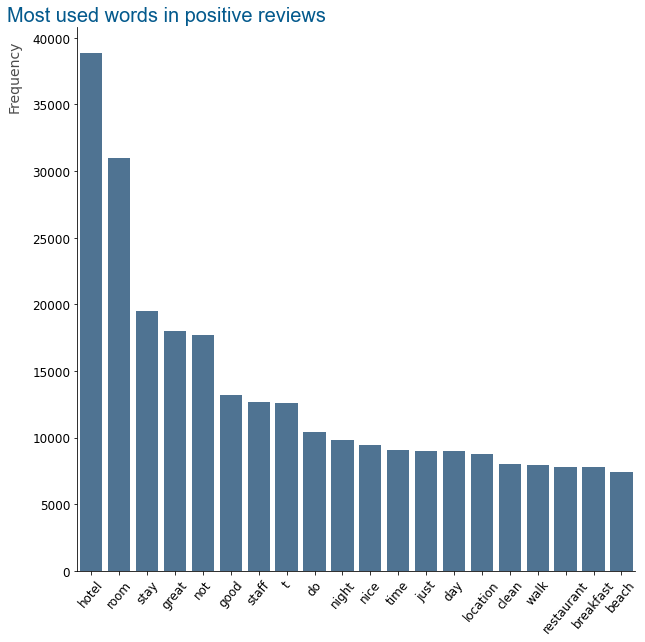

In [205]:
# plot the frequency

font = {'family': 'Arial',
       'color': '#045a8d',
       'size': 20}

fix, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=pos_fdist_top.index, y=pos_fdist_top.values, ax=ax, color = "#44749D")
plt.xticks(rotation=50);

ax.set_title("Most used words in positive reviews", fontdict=font)
ax.set_ylabel('Frequency', fontsize = 14, color='#4c4c4c')

# set axis label positions
ax.yaxis.set_label_coords(-.1,.91)
ax.title.set_position([.16, .8])

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()

In [206]:
# create corpus of all positive reviews
neg_corpus = " ".join(review for review in neg.review_cln)

# tokenize the words
neg_tokens = word_tokenize(neg_corpus)

# find frequency of each token
fdist = FreqDist(neg_tokens)

fdist.most_common(20)

[('room', 4162),
 ('hotel', 3857),
 ('not', 3697),
 ('stay', 1879),
 ('t', 1659),
 ('no', 1562),
 ('do', 1535),
 ('day', 1212),
 ('night', 1158),
 ('staff', 965),
 ('time', 903),
 ('service', 891),
 ('go', 891),
 ('say', 847),
 ('get', 780),
 ('just', 776),
 ('tell', 774),
 ('bad', 773),
 ('place', 731),
 ('check', 723)]

In [207]:
# create series of frequency
neg_fdist = pd.Series(dict(fdist))

# sort in descenidng order
neg_fdist.sort_values(ascending=False, inplace=True)

neg_fdist_top = neg_fdist.head(20)

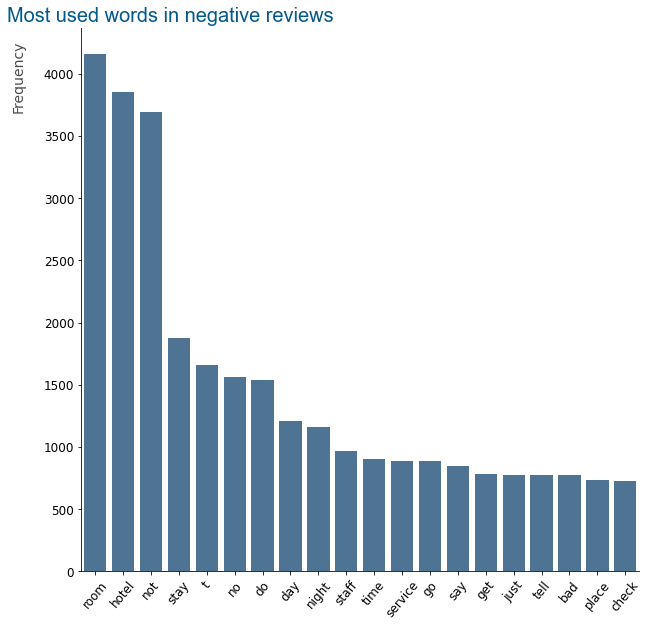

In [208]:
# plot the frequency

font = {'family': 'Arial',
       'color': '#045a8d',
       'size': 20}

fix, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=neg_fdist_top.index, y=neg_fdist_top.values, ax=ax, color = "#44749D")
plt.xticks(rotation=50);

ax.set_title("Most used words in negative reviews", fontdict=font)
ax.set_ylabel('Frequency', fontsize = 14, color='#4c4c4c')

# set axis label positions
ax.yaxis.set_label_coords(-.1,.91)
ax.title.set_position([.16, .8])

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()

In [209]:
pos_bigrams = (pd.Series(nltk.ngrams(pos_tokens, 2)).value_counts())[:25]
pos_bigrams

(do, t)                3732
(do, not)              2379
(stay, hotel)          1810
(staff, friendly)      1754
(great, location)      1740
(room, clean)          1530
(minute, walk)         1436
(ca, t)                1402
(hotel, great)         1374
(great, hotel)         1342
(friendly, helpful)    1282
(recommend, hotel)     1264
(hotel, stay)          1245
(walk, distance)       1193
(highly, recommend)    1181
(punta, cana)          1163
(hotel, staff)          987
(stay, night)           983
(place, stay)           963
(th, floor)             961
(just, return)          938
(hotel, room)           926
(room, service)         917
(staff, helpful)        863
(no, problem)           805
dtype: int64

In [210]:
pos_trigrams = (pd.Series(nltk.ngrams(pos_tokens, 3)).value_counts())[:25]
pos_trigrams

(staff, friendly, helpful)        690
(hotel, great, location)          486
(room, th, floor)                 346
(highly, recommend, hotel)        322
(flat, screen, tv)                276
(great, place, stay)              255
(old, san, juan)                  247
(king, size, bed)                 244
(ca, t, wait)                     237
(great, hotel, great)             208
(just, return, night)             198
(hotel, staff, friendly)          183
(good, value, money)              179
(easy, walk, distance)            177
(la, carte, restaurant)           166
(staff, helpful, friendly)        166
(free, internet, access)          163
(do, t, want)                     159
(stay, hotel, night)              152
(minute, walk, away)              145
(ca, t, beat)                     144
(hotel, stay, hotel)              142
(definitely, recommend, hotel)    140
(hotel, good, location)           139
(do, t, eat)                      137
dtype: int64

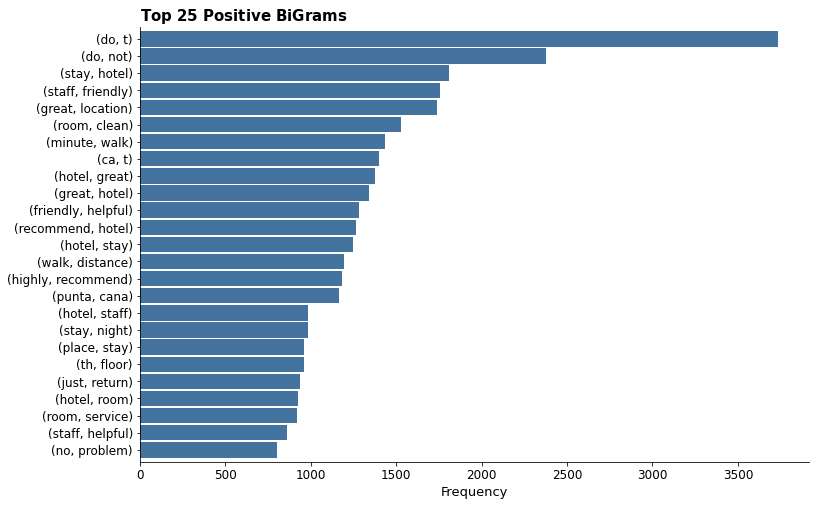

In [211]:
# create figure
fig, ax = plt.subplots(figsize = (12,8))

# width of the bar
width = .85

# create horizontal bar chart


pos_bigrams.sort_values().plot.barh(color='#44749D', width=.9)

# remove x axis ticks
#ax.axes.xaxis.set_ticks([])

# remove vertical grid
ax.xaxis.grid(False)

# remove horizontal grid
ax.yaxis.grid(False)

# set x axis label
ax.set_xlabel('Frequency', fontsize = 13)

# title
ax.set_title('$\\bf{Top\ 25\ Positive\ BiGrams}$', fontsize = 15, loc = 'left')

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()

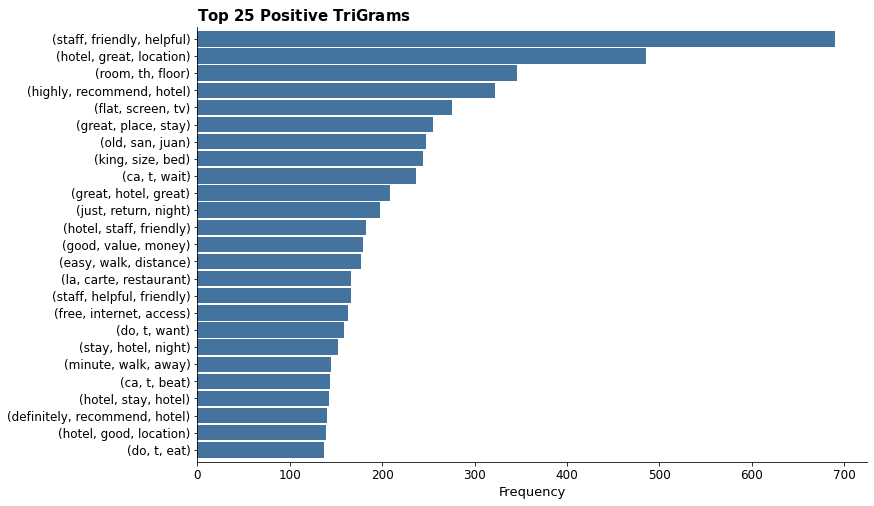

In [212]:
# create figure
fig, ax = plt.subplots(figsize = (12,8))

# width of the bar
width = .85

# create horizontal bar chart


pos_trigrams.sort_values().plot.barh(color='#44749D', width=.9)

# remove x axis ticks
#ax.axes.xaxis.set_ticks([])

# remove vertical grid
ax.xaxis.grid(False)

# remove horizontal grid
ax.yaxis.grid(False)

# set x axis label
ax.set_xlabel('Frequency', fontsize = 13)

# title
ax.set_title('$\\bf{Top\ 25\ Positive\ TriGrams}$', fontsize = 15, loc = 'left')

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()

In [213]:
neg_bigrams = (pd.Series(nltk.ngrams(neg_tokens, 2)).value_counts())[:25]
neg_bigrams

(do, not)              577
(do, t)                483
(stay, hotel)          176
(room, not)            172
(punta, cana)          146
(not, stay)            134
(star, hotel)          126
(credit, card)         122
(hotel, not)           116
(hotel, stay)          113
(not, work)            113
(customer, service)    105
(check, in)            103
(hotel, room)          102
(bad, hotel)            96
(not, recommend)        93
(room, small)           88
(room, service)         86
(stay, night)           83
(t, work)               81
(hotel, staff)          80
(not, worth)            79
(look, like)            79
(book, hotel)           78
(air, condition)        77
dtype: int64

In [214]:
neg_trigrams = (pd.Series(nltk.ngrams(neg_tokens, 3)).value_counts())[:25]
neg_trigrams

(do, not, work)             68
(do, t, work)               56
(not, recommend, hotel)     38
(bad, hotel, stay)          31
(room, do, not)             28
(room, not, ready)          26
(hotel, do, not)            24
(room, not, clean)          23
(do, t, want)               23
(no, hot, water)            23
(bad, hotel, experience)    23
(non, smoking, room)        22
(room, do, t)               22
(do, t, know)               21
(not, stay, hotel)          20
(do, not, want)             19
(king, size, bed)           18
(do, not, care)             18
(no, air, condition)        18
(resort, punta, cana)       17
(do, t, care)               16
(door, do, not)             16
(old, san, juan)            15
(t, waste, money)           15
(year, old, son)            14
dtype: int64

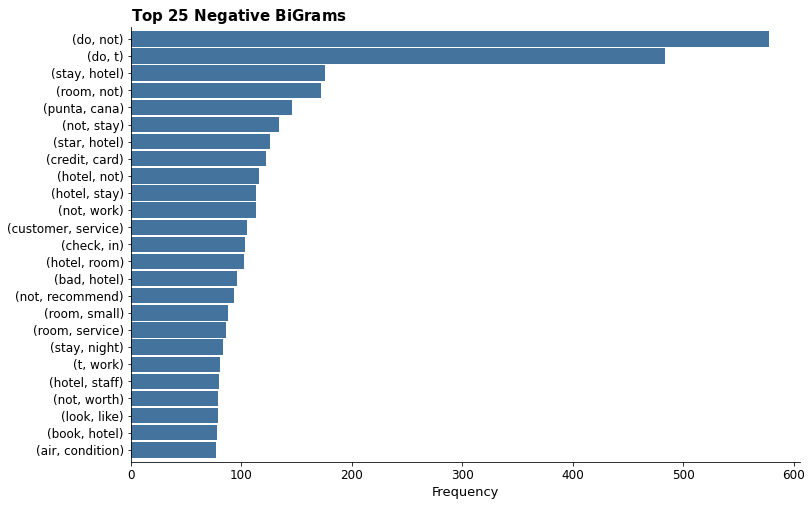

In [215]:
# create figure
fig, ax = plt.subplots(figsize = (12,8))

# width of the bar
width = .85

# create horizontal bar chart


neg_bigrams.sort_values().plot.barh(color='#44749D', width=.9)

# remove x axis ticks
#ax.axes.xaxis.set_ticks([])

# remove vertical grid
ax.xaxis.grid(False)

# remove horizontal grid
ax.yaxis.grid(False)

# set x axis label
ax.set_xlabel('Frequency', fontsize = 13)

# title
ax.set_title('$\\bf{Top\ 25\ Negative\ BiGrams}$', fontsize = 15, loc = 'left')

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()

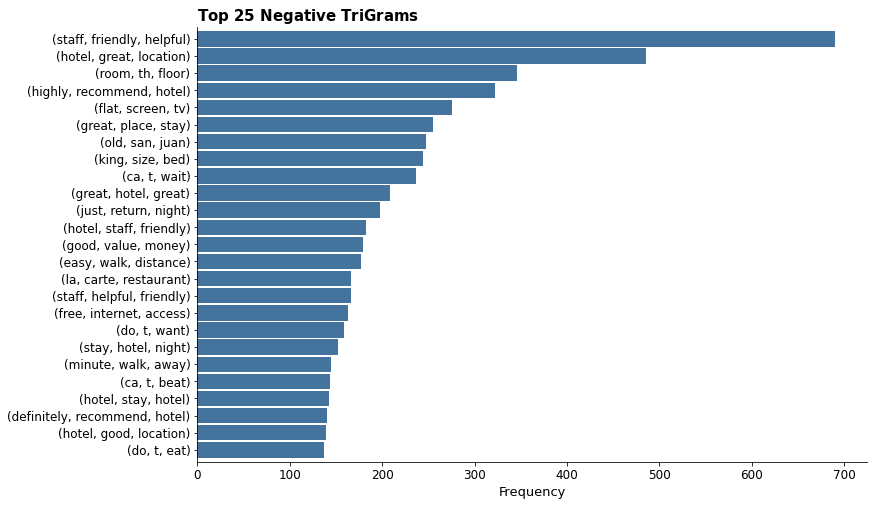

In [216]:
# create figure
fig, ax = plt.subplots(figsize = (12,8))

# width of the bar
width = .85

# create horizontal bar chart


pos_trigrams.sort_values().plot.barh(color='#44749D', width=.9)

# remove x axis ticks
#ax.axes.xaxis.set_ticks([])

# remove vertical grid
ax.xaxis.grid(False)

# remove horizontal grid
ax.yaxis.grid(False)

# set x axis label
ax.set_xlabel('Frequency', fontsize = 13)

# title
ax.set_title('$\\bf{Top\ 25\ Negative\ TriGrams}$', fontsize = 15, loc = 'left')

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()

In [217]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus=[]
for i in range(0,19650):
  review=re.sub('[^a-zA-Z]',' ',df['review'][i])
  review=review.lower()
  review=review.split()
  ps=PorterStemmer()
  all_stopwords=stopwords.words('english')
  all_stopwords.remove('not')
  review=[ps.stem(word) for word in review if not word in set (all_stopwords)]
  review=' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [218]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=20000)
df = pd.read_csv('E:\Hotel_reviews.csv')
X=cv.fit_transform(corpus).toarray()
y=df['rating']

MemoryError: Unable to allocate 2.93 GiB for an array with shape (19650, 20000) and data type int64

In [ ]:
len(X[0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

In [ ]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix , accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

In [ ]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix , accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)